In [1]:
import torch

In [2]:
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader

In [3]:
#!unzip spotify_data.zip -d dataset

Archive:  spotify_data.zip
replace dataset/spotify_top_songs_audio_features.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('dataset/spotify_top_songs_audio_features.csv')
# Convert to a NumPy array, optionally selecting only numeric columns
array = df.select_dtypes(include=[float, int, object]).to_numpy()
df.head() #we want to preview the df before converting into numpy

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30,301860377


In [6]:
numpy_all_data = df.values

In [7]:
#Split the dataset into training and validation
split_ratio = 0.9
# Shuffle the array if necessary
np.random.shuffle(numpy_all_data)  # Uncomment this line if you want to shuffle the array
split_index = int(len(numpy_all_data) * split_ratio)

train_data = numpy_all_data[:split_index]
validation_data = numpy_all_data[split_index:]


In [8]:
print(train_data.size) #This is the data set we will be using to train the model

111359


In [9]:
print(validation_data.size) #This is the data set we will use to determine the performance of our model

12388


In [36]:
#we need to split the columns into feature columns and target columns- this is going to be a regression task
features_training = train_data[:,7:-1]
target_training = train_data[:,-1]

features_validation = validation_data[:,7:-1]
target_validation = validation_data[:,-1]

#convert the dtype of the numpy to valid float to avoid issues when converting to tensor

features_training_numeric = features_training.astype(float)
target_training_numeric = target_training.astype(float)

features_validation_numeric = features_validation.astype(float)
target_validation_numeric = target_validation.astype(float)

X = torch.from_numpy(features_training_numeric).float() 
Y = torch.from_numpy(target_training_numeric).float()

n_samples,n_features = X.shape

print(X.shape)

y = Y.view(Y.shape[0],1)


#convert to tensors
#features_tensor_training = torch.tensor(features_training_numeric, dtype=torch.float32)
#target_tensor_training = torch.tensor(target_training_numeric, dtype=torch.float32)
#these tensors will be used in the validation of the model
#features_tensor_validation = torch.tensor(features_validation_numeric, dtype=torch.float32)
#target_tensor_validation = torch.tensor(target_validation_numeric, dtype=torch.float32)

torch.Size([5861, 11])


In [37]:
# Create a TensorDataset
spotify_tensor_dataset = TensorDataset(X, Y)  # Ensuring target tensor is the correct shape

train,target = spotify_tensor_dataset[0]
print(train)
print(target)

tensor([ 6.0600e-01,  6.5500e-01,  4.0200e-01,  1.3900e-01,  0.0000e+00,
         1.0300e-01,  6.9600e-01, -6.3280e+00,  1.5982e+02,  2.3669e+05,
         1.0000e+00])
tensor(5052724.)


epoch: 10, loss = nan
epoch: 20, loss = nan
epoch: 30, loss = nan
epoch: 40, loss = nan
epoch: 50, loss = nan
epoch: 60, loss = nan
epoch: 70, loss = nan
epoch: 80, loss = nan
epoch: 90, loss = nan
epoch: 100, loss = nan


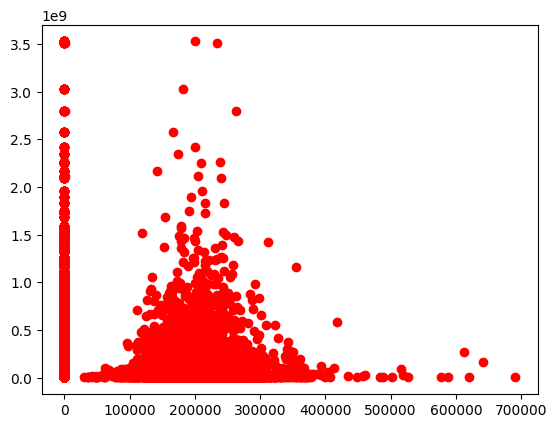

In [32]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)

import matplotlib.pyplot as plt

criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr= learning_rate)

num_epochs = 100
for epoch in range(num_epochs):
    y_predicted = model(X)
    loss = criterion(y_predicted,y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if(epoch+1) % 10 == 0:
        print(f'epoch: {epoch +1}, loss = {loss.item():.4f}')

predicted = model(X).detach().numpy()
plt.plot(X, y,'ro')
plt.plot(X,predicted,'b')
plt.show()



In [33]:
#Dataset stores the samples and their corresponding labels 

batch_size = 4
#DataLoader wraps an iterable around the Dataset to enable easy access to the samples.
regression_train_loader = DataLoader(spotify_tensor_dataset, batch_size = batch_size, shuffle = True)


In [34]:
#Define the model that we are going to use
import torch.nn as nn
import torch.optim as optim

class SongPopularityPredictor(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, dropout_rate):
        super(SongPopularityPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.bn2 = nn.BatchNorm1d(hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        
        self.fc3 = nn.Linear(hidden_size2, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        return x


In [10]:
#Initialize the model instance, also include the loss function, we will use Mean Squared Loss since this a regression task
import torch.optim as optim
import torch.nn.functional as F

# Assuming your input features have 11 dimensions
input_size = 11
hidden_size1 = 64
hidden_size2 = 32
dropout_rate = 0.2

model = SongPopularityPredictor(input_size, hidden_size1, hidden_size2, dropout_rate)
outputs = model(X)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
#Run training loop for our model
# Assuming model, criterion (loss function), and optimizer are defined
num_epochs = 20
for epoch in range(num_epochs):
    for inputs, targets in regression_train_loader:
        model.train()
        model.eval()
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    
    # Print or log the loss for monitoring
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

NameError: name 'SongPopularityPredictor' is not defined